<a href="https://colab.research.google.com/github/AKHILESH-create/AIML-Concepts/blob/main/AI_Training13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Naive Bayes Algorithm

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
from sklearn.datasets import load_breast_cancer
df=load_breast_cancer()

In [ ]:
df.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
df.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
df.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
df.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
df1=pd.DataFrame(np.c_[df.data, df.target],
                 columns=[list(df.feature_names)+['target']])
df1.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0


In [ ]:
#split data in x and y (input and output)
x=df1.iloc[:,0:-1].values
y=df1.iloc[:,-1].values

In [ ]:
print("Shape of x",x.shape)
print("Shape of y",y.shape)


Shape of x (569, 30)
Shape of y (569,)


In [ ]:
#Divide data into Training and Testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=51)

In [ ]:
print("Shape of x_tain", x_train.shape)
print("Shape of y_teat", x_test.shape)

Shape of x_tain (398, 30)
Shape of y_teat (171, 30)


Gaussian

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [ ]:
classifier.score(x_test,y_test)

0.9122807017543859

MULTINOMINAl

In [ ]:
#Multinomial
from sklearn.naive_bayes import MultinomialNB
cm=MultinomialNB()
cm.fit(x_train,y_train)

MultinomialNB()

In [ ]:
cm.score(x_test,y_test)

0.8830409356725146

Bernoulli

In [ ]:
from sklearn.naive_bayes import BernoulliNB
cm=BernoulliNB()
cm.fit(x_train,y_train)

BernoulliNB()

In [ ]:
cm.score(x_test,y_test)

0.6432748538011696

Model Evolution

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(x_test)
cm=confusion_matrix(y_test,y_pred)

<Axes: >

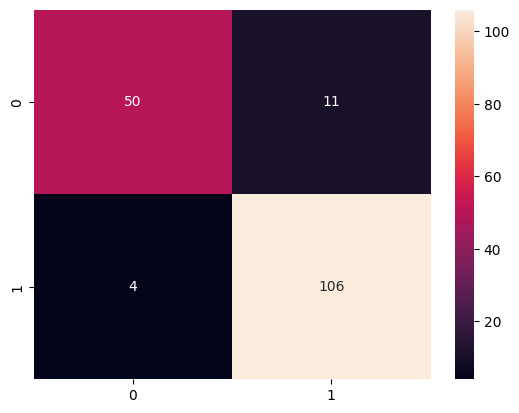

In [ ]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='g')

In [ ]:
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

In [ ]:
cm=confusion_matrix(y_test,y_pred)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)

Accuracy:  0.9122807017543859


In [ ]:
pre=precision_score(y_test,y_pred)
print("Precision: ",pre)

Precision:  0.905982905982906


In [ ]:
f1=recall_score(y_test,y_pred)
print("Recall: ",f1)

Recall:  0.9636363636363636
